### Fitting DataSets to Shallow and Deep Neural Net

#### Easy (Titanic)

Preprocessing

In [1]:
import pandas as pd
import numpy as np
import re
import keras
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [2]:
# https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [3]:
# Load data
titanic = pd.read_csv(r"C:\Users\Axel\Documents\Nova_IMS\2_Semester\Deep Learning\Project\data_files\data_files\Easy\titanic.csv")

In [4]:
# Drop ticket, home.dest, boat, body
titanic = titanic.drop(['ticket'], axis=1)
titanic = titanic.drop(['home.dest'], axis=1)
titanic = titanic.drop(['boat'], axis=1)
titanic = titanic.drop(['body'], axis=1)

In [5]:
# Deal with cabin missing values
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

titanic['cabin'] = titanic['cabin'].fillna("U0")
titanic['deck'] = titanic['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
titanic['deck'] = titanic['deck'].map(deck)
titanic['deck'] = titanic['deck'].fillna(0)
titanic['deck'] = titanic['deck'].astype(int)
# we can now drop the cabin feature
titanic = titanic.drop(['cabin'], axis=1)

In [6]:
# Deal with Age missing values
mean = titanic["age"].mean()
std = titanic["age"].std()
is_null = titanic["age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = titanic["age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
titanic["age"] = age_slice
titanic["age"] = titanic["age"].astype(int)

In [7]:
# Deal with Embarked missing values
common_value = 'S'
titanic['embarked'] = titanic['embarked'].fillna(common_value)

In [8]:
# Converting Fares
titanic['fare'] = titanic['fare'].fillna(0)
titanic['fare'] = titanic['fare'].astype(int)

In [9]:
# Converting Names
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

# extract titles
titanic['title'] = titanic.name.str.extract(' ([A-Za-z]+)\.', expand=False)
# replace titles with a more common title or as Rare
titanic['title'] = titanic['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')
# convert titles into numbers
titanic['title'] = titanic['title'].map(titles)
# filling NaN with 0, to get safe
titanic['title'] = titanic['title'].fillna(0)
titanic = titanic.drop(['name'], axis=1)

In [10]:
# Converting Sex
genders = {"male": 0, "female": 1}
titanic['sex'] = titanic['sex'].map(genders)

In [11]:
# Converting Embarked
ports = {"S": 0, "C": 1, "Q": 2}
titanic['embarked'] = titanic['embarked'].map(ports)

In [12]:
# Rearrange columns
titanic = titanic[['pclass', "sex","age","sibsp","parch","fare", "embarked", "deck", "title", "survived"]]

In [13]:
# Encoding

In [14]:
onehotencoder = OneHotEncoder(categorical_features = [0, 3, 4, 7, 8])
titanic = onehotencoder.fit_transform(titanic).toarray()

C:\Users\Axel\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Axel\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [15]:
titanic = pd.DataFrame(titanic)

In [16]:
titanic.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,29.0,211.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,151.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.0,151.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,30.0,151.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,25.0,151.0,0.0,0.0


Split to train and test set

In [17]:
# Create train, test set
y = titanic[36]
X = titanic.drop(36, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# get validation set
x_val = X_train[:100]
partial_X_train = X_train[100:]
y_val = y_train[:100]
partial_y_train = y_train[100:]

Shallow Neural Net

In [19]:
def keras_shallow(input_dim=39, n_layers=3, n_neurons=6, r_dropout=0.5, optimizer="rmsprop", loss="binary_crossentropy", init="uniform", metrics=["accuracy"], random_state=42):
    """
    shallow neural net, define the amount of layers either having 1 or 2 hidden layers., which optimizer you want to use and which loss function you want to apply.
    """ 
    np.random.seed(random_state)
    

    from keras import backend as K
    K.clear_session()


    model = models.Sequential()
    model.add(layers.Dense(n_neurons, activation="relu", input_dim=input_dim))
    model.add(layers.Dropout(r_dropout))
    for num in range(n_layers-2):
        model.add(layers.Dense(n_neurons, activation="relu"))
        model.add(layers.Dropout(r_dropout))
    model.add(layers.Dense(1, activation="sigmoid", init=init))
    model.compile(optimizer, loss, metrics=metrics)
    
    return model

In [20]:
shallow_nn = keras_shallow(input_dim=len(X_train.columns))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\Axel\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


In [21]:
history_shallow = shallow_nn.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 816 samples, validate on 100 samples
Epoch 1/20
816/816 [==============================] - 0s 384us/step - loss: 0.6844 - acc: 0.5993 - val_loss: 0.6811 - val_acc: 0.6700
Epoch 2/20
816/816 [==============================] - 0s 10us/step - loss: 0.6833 - acc: 0.5944 - val_loss: 0.6795 - val_acc: 0.6800
Epoch 3/20
816/816 [==============================] - 0s 11us/step - loss: 0.6720 - acc: 0.6446 - val_loss: 0.6740 - val_acc: 0.6800
Epoch 4/20
816/816 [==============================] - 0s 10us/step - loss: 0.6758 - acc: 0.6103 - val_loss: 0.6710 - val_acc: 0.6700
Epoch 5/20
816/816 [==============================] - 0s 12us/step - loss: 0.6719 - acc: 0.6103 - val_loss: 0.6680 - val_acc: 0.6700
Epoch 6/20
816/816 [==============================] - 0s 13us/step - loss: 0.6736 - acc: 0.6176 - val_loss: 0.6679 - val_acc: 0.6700
Epoch 7/20
816/816 [==============================] - 0s 9us/step - loss: 0.6700 - acc: 0.6324 - val_loss: 

In [22]:
history_dict = history_shallow.history

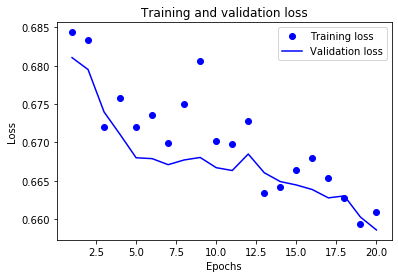

In [23]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

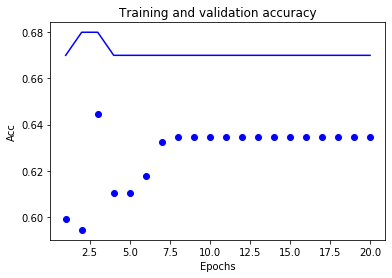

In [24]:
plt.clf()
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.show()

In [25]:
shallow_nn.predict(X_test)

array([[0.43176654],
       [0.4707073 ],
       [0.43516946],
       [0.45552045],
       [0.4300447 ],
       [0.44104072],
       [0.44883925],
       [0.45030394],
       [0.43685043],
       [0.48515347],
       [0.47678572],
       [0.4541994 ],
       [0.47581056],
       [0.46086478],
       [0.43516946],
       [0.45271415],
       [0.43345582],
       [0.44759238],
       [0.48726422],
       [0.46979123],
       [0.45752344],
       [0.43012786],
       [0.45570457],
       [0.46236667],
       [0.4556931 ],
       [0.48542425],
       [0.42812282],
       [0.44723898],
       [0.45443135],
       [0.4866274 ],
       [0.452192  ],
       [0.48663753],
       [0.48312068],
       [0.48237044],
       [0.48862082],
       [0.44675884],
       [0.48917347],
       [0.4417444 ],
       [0.48917347],
       [0.4613784 ],
       [0.44219857],
       [0.46068034],
       [0.4251836 ],
       [0.4531685 ],
       [0.4673883 ],
       [0.44883925],
       [0.43991932],
       [0.462

Deep Neural Network

In [26]:
def keras_deep(input_dim=39, n_layers=9, n_neurons=12, r_dropout=0.5, optimizer="rmsprop", loss="binary_crossentropy", init="uniform", metrics=["accuracy"], random_state=42):
    """
    Keras Neural Network, define the amount of layers you want, which optimizer you want to use and which loss function you want to apply.
    """ 
    np.random.seed(random_state)
    

    from keras import backend as K
    K.clear_session()


    model = models.Sequential()
    model.add(layers.Dense(n_neurons, activation="relu", input_dim=input_dim))
    model.add(layers.Dropout(r_dropout))
    for num in range(n_layers-2):
        model.add(layers.Dense(n_neurons, activation="relu"))
        model.add(layers.Dropout(r_dropout))
    model.add(layers.Dense(1, activation="sigmoid", init=init))
    model.compile(optimizer, loss, metrics=metrics)
    
    return model

In [27]:
deep_nn = keras_deep(input_dim=len(X_train.columns))

C:\Users\Axel\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


In [28]:
history_deep = deep_nn.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 816 samples, validate on 100 samples
Epoch 1/20
816/816 [==============================] - 1s 859us/step - loss: 0.7268 - acc: 0.6115 - val_loss: 0.6919 - val_acc: 0.6700
Epoch 2/20
816/816 [==============================] - 0s 17us/step - loss: 0.6997 - acc: 0.6127 - val_loss: 0.6912 - val_acc: 0.6700
Epoch 3/20
816/816 [==============================] - 0s 20us/step - loss: 0.7103 - acc: 0.6311 - val_loss: 0.6908 - val_acc: 0.6700
Epoch 4/20
816/816 [==============================] - 0s 16us/step - loss: 0.6938 - acc: 0.6078 - val_loss: 0.6903 - val_acc: 0.6700
Epoch 5/20
816/816 [==============================] - 0s 21us/step - loss: 0.6958 - acc: 0.6201 - val_loss: 0.6899 - val_acc: 0.6700
Epoch 6/20
816/816 [==============================] - 0s 20us/step - loss: 0.6998 - acc: 0.6115 - val_loss: 0.6895 - val_acc: 0.6700
Epoch 7/20
816/816 [==============================] - 0s 17us/step - loss: 0.6924 - acc: 0.6287 - val_loss: 0.6891 - val_acc: 0.6700
Epoch 8/20
816/816 [==

In [29]:
history_dict = history_deep.history

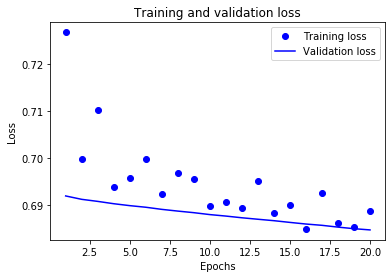

In [30]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

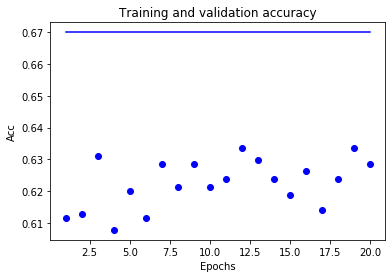

In [31]:
plt.clf()
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.show()

In [32]:
deep_nn.predict(X_test)

array([[0.48708203],
       [0.48669207],
       [0.4870606 ],
       [0.486981  ],
       [0.48709786],
       [0.4870653 ],
       [0.48699436],
       [0.4870486 ],
       [0.48707533],
       [0.4863766 ],
       [0.4864328 ],
       [0.48705983],
       [0.4867615 ],
       [0.48694295],
       [0.4870606 ],
       [0.48697174],
       [0.48708403],
       [0.48697788],
       [0.48636425],
       [0.48674214],
       [0.4869528 ],
       [0.48704416],
       [0.48696515],
       [0.48688623],
       [0.48697224],
       [0.4863835 ],
       [0.48713538],
       [0.4869976 ],
       [0.48696068],
       [0.48635015],
       [0.4870508 ],
       [0.48641416],
       [0.48648417],
       [0.48637202],
       [0.4863817 ],
       [0.487036  ],
       [0.48638943],
       [0.48710248],
       [0.48639852],
       [0.486781  ],
       [0.4870413 ],
       [0.48695076],
       [0.48712677],
       [0.4870062 ],
       [0.48691285],
       [0.48699436],
       [0.48706526],
       [0.486

#### Santander (Big)

Preprocessing

In [33]:
# Load data
santander = pd.read_csv(r"C:\Users\Axel\Documents\Nova_IMS\2_Semester\Deep Learning\Project\data_files\data_files\Big\santander.csv")

In [34]:
santander = santander.drop(["ID_code"], axis=1)

Split train and test data

In [35]:
# Get train and test set
y = santander.target
X = santander.drop(["target"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# get validation set
x_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Shallow Neural Net

In [37]:
shallow_nn = keras_shallow(input_dim=len(X_train.columns))

C:\Users\Axel\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


In [38]:
history_shallow = shallow_nn.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 130000 samples, validate on 10000 samples
Epoch 1/20
130000/130000 [==============================] - 2s 14us/step - loss: 0.4377 - acc: 0.8983 - val_loss: 0.3722 - val_acc: 0.9033
Epoch 2/20
130000/130000 [==============================] - 2s 12us/step - loss: 0.3822 - acc: 0.9001 - val_loss: 0.3349 - val_acc: 0.9033
Epoch 3/20
130000/130000 [==============================] - 2s 12us/step - loss: 0.3417 - acc: 0.9001 - val_loss: 0.2842 - val_acc: 0.9033
Epoch 4/20
130000/130000 [==============================] - 2s 12us/step - loss: 0.3186 - acc: 0.9001 - val_loss: 0.2893 - val_acc: 0.9033
Epoch 5/20
130000/130000 [==============================] - 2s 12us/step - loss: 0.3064 - acc: 0.9001 - val_loss: 0.2771 - val_acc: 0.9033
Epoch 6/20
130000/130000 [==============================] - 2s 12us/step - loss: 0.3020 - acc: 0.9001 - val_loss: 0.2759 - val_acc: 0.9033
Epoch 7/20
130000/130000 [==============================] - 2s 12us/step - loss: 0.2985 - acc: 0.9001 - val_loss: 0

In [39]:
history_dict = history_shallow.history

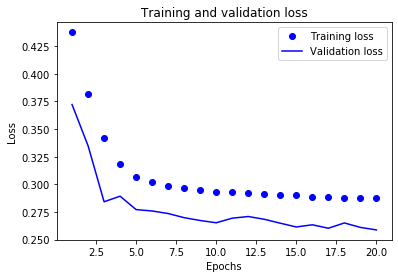

In [40]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

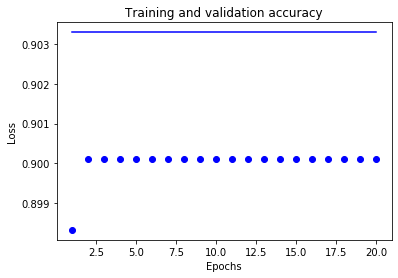

In [41]:
plt.clf()
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [42]:
shallow_nn.predict(X_test)

array([[0.00154737],
       [0.00675672],
       [0.00966281],
       ...,
       [0.18469712],
       [0.00112084],
       [0.06918627]], dtype=float32)

Deep Neural Network

In [43]:
deep_nn = keras_deep(input_dim=len(X_train.columns))

C:\Users\Axel\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


In [44]:
history_deep = deep_nn.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 130000 samples, validate on 10000 samples
Epoch 1/20
130000/130000 [==============================] - 3s 26us/step - loss: 0.5103 - acc: 0.8983 - val_loss: 0.5059 - val_acc: 0.9033
Epoch 2/20
130000/130000 [==============================] - 2s 17us/step - loss: 0.3800 - acc: 0.9001 - val_loss: 0.3227 - val_acc: 0.9033
Epoch 3/20
130000/130000 [==============================] - 2s 17us/step - loss: 0.3424 - acc: 0.9001 - val_loss: 0.3196 - val_acc: 0.9033
Epoch 4/20
130000/130000 [==============================] - 2s 17us/step - loss: 0.3351 - acc: 0.9001 - val_loss: 0.3185 - val_acc: 0.9033
Epoch 5/20
130000/130000 [==============================] - 2s 17us/step - loss: 0.3310 - acc: 0.9001 - val_loss: 0.3204 - val_acc: 0.9033
Epoch 6/20
130000/130000 [==============================] - 2s 17us/step - loss: 0.3276 - acc: 0.9001 - val_loss: 0.3205 - val_acc: 0.9033
Epoch 7/20
130000/130000 [==============================] - 2s 17us/step - loss: 0.3239 - acc: 0.9001 - val_loss: 0

In [45]:
history_dict = history_deep.history

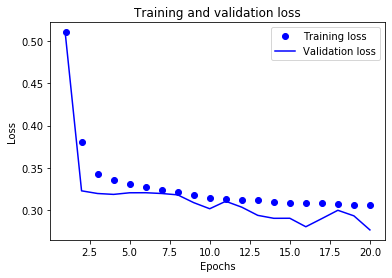

In [46]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

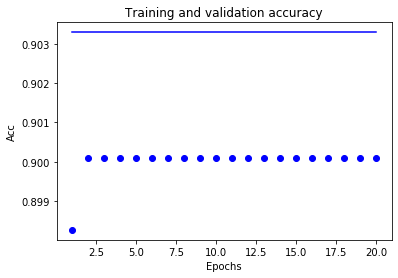

In [47]:
plt.clf()
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.show()

In [48]:
deep_nn.predict(X_test)

array([[0.00470555],
       [0.01401776],
       [0.01590341],
       ...,
       [0.14489168],
       [0.00126794],
       [0.05512908]], dtype=float32)

#### Weather Australia (Time Series)

Preprocessing

In [92]:
weather = pd.read_csv(r"C:\Users\Axel\Documents\Nova_IMS\2_Semester\Deep Learning\Project\data_files\data_files\TimeSeries\weatherAUS.csv")

In [93]:
weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [94]:
weather.shape

(142193, 24)

In [95]:
weather.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [96]:
weather = weather.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"], axis=1)

In [97]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No


In [98]:
weather['RainTomorrow'] = weather['RainTomorrow'].map({'Yes': 1, 'No': 0})
weather['RainToday'] = weather['RainToday'].map({'Yes': 1, 'No': 0})

In [99]:
weather["WindGustDir"].value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [100]:
weather["Temp3pm"] = weather["Temp3pm"].fillna(weather["Temp3pm"].mean())
weather["Pressure3pm"] = weather["Pressure3pm"].fillna(weather["Pressure3pm"].mean())
weather["Temp9am"] = weather["Temp9am"].fillna(weather["Temp9am"].mean())
weather["Pressure9am"] = weather["Pressure3pm"].fillna(weather["Pressure3pm"].mean())
weather["Humidity9am"] = weather["Humidity9am"].fillna(weather["Humidity9am"].mean())
weather["Humidity3pm"] = weather["Humidity3pm"].fillna(weather["Humidity3pm"].mean())
weather["MinTemp"] = weather["MinTemp"].fillna(weather["MinTemp"].mean())
weather["MaxTemp"] = weather["MaxTemp"].fillna(weather["MaxTemp"].mean())
weather["WindGustSpeed"] = weather["WindGustSpeed"].fillna(weather["WindGustSpeed"].mean())
weather["WindSpeed9am"] = weather["WindSpeed9am"].fillna(weather["WindSpeed9am"].mean())
weather["WindSpeed3pm"] = weather["WindSpeed3pm"].fillna(weather["WindSpeed3pm"].mean())

In [101]:
weather.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          1406
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [102]:
weather = weather.drop(["WindGustDir","WindDir9am"], axis=1)

In [103]:
weather = weather[pd.notnull(weather['RainToday'])]
weather = weather[pd.notnull(weather['Rainfall'])]
weather = weather[pd.notnull(weather['WindDir3pm'])]

In [104]:
weather.shape

(137117, 18)

In [105]:
weather.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [106]:
weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,44.0,WNW,20.0,24.0,71.0,22.0,1007.1,1007.1,16.9,21.8,0.0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,WSW,4.0,22.0,44.0,25.0,1007.8,1007.8,17.2,24.3,0.0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,46.0,WSW,19.0,26.0,38.0,30.0,1008.7,1008.7,21.0,23.2,0.0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,24.0,E,11.0,9.0,45.0,16.0,1012.8,1012.8,18.1,26.5,0.0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,NW,7.0,20.0,82.0,33.0,1006.0,1006.0,17.8,29.7,0.0,0.2,0
5,2008-12-06,Albury,14.6,29.7,0.2,56.0,W,19.0,24.0,55.0,23.0,1005.4,1005.4,20.6,28.9,0.0,0.0,0
6,2008-12-07,Albury,14.3,25.0,0.0,50.0,W,20.0,24.0,49.0,19.0,1008.2,1008.2,18.1,24.6,0.0,0.0,0
7,2008-12-08,Albury,7.7,26.7,0.0,35.0,W,6.0,17.0,48.0,19.0,1010.1,1010.1,16.3,25.5,0.0,0.0,0
8,2008-12-09,Albury,9.7,31.9,0.0,80.0,NW,7.0,28.0,42.0,9.0,1003.6,1003.6,18.3,30.2,0.0,1.4,1
9,2008-12-10,Albury,13.1,30.1,1.4,28.0,SSE,15.0,11.0,58.0,27.0,1005.7,1005.7,20.1,28.2,1.0,0.0,0


In [108]:
weather["Date"] = pd.to_datetime(weather["Date"])

In [111]:
#https://stackoverflow.com/questions/42044003/how-to-use-date-and-time-values-as-features-to-predict-a-value-using-a-neural-ne
import datetime
date_features = weather["Date"]

# Get the list with days since earliest event
date_features = [(i - min(date_features)).days for i in date_features]

KeyboardInterrupt: 

In [ ]:
onehotencoder = OneHotEncoder(categorical_features = ["WindDir3pm"])
weather = onehotencoder.fit_transform(weather).toarray()
weather = pd.DataFrame(weather)

In [ ]:
weather = weather.drop(["Location"], axis=1)

In [ ]:
weather["Date"] = date_features

Split into Train and Test Set

In [ ]:
# Get train and test set
y = santander.RainTomorrow
X = santander.drop(["RainTomorrow"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# get validation set
x_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Shallow Neural Network

In [ ]:
shallow_nn = keras_shallow(input_dim=len(X_train.columns))

In [ ]:
history_shallow = shallow_nn.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

In [ ]:
history_dict = history_shallow.history

In [ ]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
plt.clf()
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
shallow_nn.predict(X_test)

Deep Neural Network

In [ ]:
deep_nn = keras_deep(input_dim=len(X_train.columns))

In [ ]:
history_deep = deep_nn.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

In [ ]:
history_dict = history_deep.history

In [ ]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
plt.clf()
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.show()

In [ ]:
deep_nn.predict(X_test)

#### Cactus (Image)

Preprocessing

In [115]:
train_dir = r'C:\Users\Axel\Documents\Nova_IMS\2_Semester\Deep Learning\Project\data_files\data_files\Cactus_Image\training_set'
test_dir = r"C:\Users\Axel\Documents\Nova_IMS\2_Semester\Deep Learning\Project\data_files\data_files\Cactus_Image\testing_set"

In [116]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [117]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode="binary")

Found 17500 images belonging to 2 classes.


In [118]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode="binary")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Axel\\Documents\\Nova_IMS\\2_Semester\\Deep Learning\\Project\\data_files\\data_files\\Cactus_Image\\testing_set'

In [141]:
train_generator[0][0].shape

(20, 64, 64, 3)